In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("cars_train.csv")
data.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [3]:
#Rows containing null fields
null_data = data[data.isnull().any(axis=1)]
print(null_data)

     symboling  normalized.losses           make fuel.type aspiration  \
2            3              150.0          mazda       gas        std   
3            3              194.0         nissan       gas        std   
6            2                NaN        renault       gas        std   
9            0                NaN          mazda    diesel        std   
10           0                NaN           audi       gas      turbo   
11           0                NaN          isuzu       gas        std   
12           0                NaN     volkswagen       gas        std   
15           0              110.0          honda       gas        std   
16          -1                NaN         toyota       gas        std   
20           2              137.0          honda       gas        std   
31           3                NaN     mitsubishi       gas      turbo   
34           0                NaN         jaguar       gas        std   
35           0                NaN          isuzu   

We have multiple ways to treat NA values
1. Fill with Mean/Average
2. using fillna(0) 
3. using fillna(bfill)
etc

I have used the below method as we have two types of column char and integer that's why i have chosen bfill over 0 and average


In [4]:
#I have used bfill to fill the Na data
data = data.fillna(method='bfill')

In [5]:
# To check for null data
null_data = data[data.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [symboling, normalized.losses, make, fuel.type, aspiration, num.of.doors, body.style, drive.wheels, engine.location, wheel.base, length, width, height, curb.weight, engine.type, num.of.cylinders, engine.size, fuel.system, bore, stroke, compression.ratio, horsepower, peak.rpm, city.mpg, highway.mpg, Car_Price]
Index: []

[0 rows x 26 columns]


In [6]:
data.describe()

,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.907407,124.234568,98.354321,173.595062,65.843210,53.537654,2561.932099,128.160494,3.343580,3.243148,10.008704,106.179012,5124.074074,25.123457,30.679012,13223.716049
std,1.298855,36.045097,6.049384,12.339100,2.022325,2.346770,524.474870,41.684844,0.272792,0.356490,3.735804,41.375707,500.037956,6.604878,6.879309,7690.678949
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,98.000000,94.500000,166.425000,64.125000,52.000000,2151.000000,98.000000,3.150000,3.080000,8.700000,72.250000,4800.000000,19.000000,25.000000,7604.500000
50%,1.000000,118.000000,96.500000,172.400000,65.450000,53.700000,2419.500000,120.000000,3.340000,3.270000,9.000000,95.000000,5150.000000,24.000000,30.000000,10921.500000
75%,2.000000,150.000000,101.200000,181.650000,66.575000,55.500000,2975.750000,146.000000,3.600000,3.460000,9.400000,122.500000,5500.000000,30.000000,34.000000,16612.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [7]:
#Scatter plot between Car price and symboling
x= data['symboling'].values
y= data['Car_Price'].values

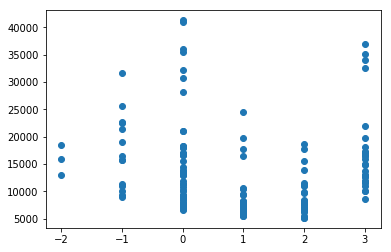

In [8]:
plt.scatter(x,y)
plt.show()

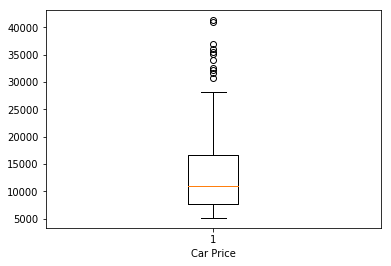

In [9]:
#Box plot to predict outliers
x1= data['fuel.type'].values
y1= data['Car_Price'].values
plt.boxplot(y1)
plt.xlabel('Car Price')
plt.show()

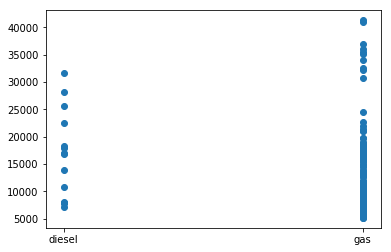

In [10]:
# Scatter plot shows Gas vehicle are more in number and prices are also high as compared to diesel
x2= data['fuel.type'].values
y2= data['Car_Price'].values
plt.scatter(x2,y2)
plt.show()

In [11]:
#Coefficient between symboling and car-price
from scipy.stats.stats import pearsonr
x= data['symboling'].values
y= data['Car_Price'].values
pearsonr(x, y)

(-0.060501629942407605, 0.44439185413745486)

Decide which categorical variables to use in model

In [13]:
# To see how many different categories do we have for each Ordinal/nominal variable
for col_name in data.columns:
    if data[col_name].dtype == 'object':
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'make' has 21 unique categories
Feature 'fuel.type' has 2 unique categories
Feature 'aspiration' has 2 unique categories
Feature 'num.of.doors' has 2 unique categories
Feature 'body.style' has 5 unique categories
Feature 'drive.wheels' has 3 unique categories
Feature 'engine.location' has 2 unique categories
Feature 'engine.type' has 7 unique categories
Feature 'num.of.cylinders' has 7 unique categories
Feature 'fuel.system' has 8 unique categories


In [14]:
#To list make column with each of the categories
print (data['make'].value_counts().sort_values(ascending=False).head(21))

toyota           26
nissan           16
honda            14
subaru           13
mazda            12
mitsubishi       11
peugot           10
volvo             8
volkswagen        7
bmw               6
porsche           5
saab              5
mercedes-benz     5
plymouth          4
dodge             4
audi              3
chevrolet         3
jaguar            3
isuzu             3
renault           2
alfa-romero       2
Name: make, dtype: int64


Create a list of features as dummy

pd.get_dummies(data, columns =['fuel.type', 'aspiration', 'num.of.doors', 'body.style', 'drive.wheels', 'engine.location', 'engine.type', 'num.of.cylinders', 'fuel.system'])
   

In [15]:
#List of categorical/nominal variable
todummy_list = ['fuel.type', 'aspiration', 'num.of.doors', 'drive.wheels', 'engine.type', 'num.of.cylinders', 'fuel.system']

In [16]:
#Function to create dummy varibale as model can only be fed with numeric data
def dummy_data(data, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(data[x], prefix=x, dummy_na = False)
        data = data.drop(x,1)
        data = pd.concat([data, dummies], axis=1)
    return data    
        

In [17]:
D = dummy_data(data, todummy_list)
print (D.head(5))

   symboling  normalized.losses        make body.style engine.location  \
0          1              129.0       mazda  hatchback           front   
1          1              125.0  mitsubishi      sedan           front   
2          3              150.0       mazda  hatchback           front   
3          3              194.0      nissan  hatchback           front   
4          0               85.0       honda      sedan           front   

   wheel.base  length  width  height  curb.weight        ...         \
0        98.8   177.8   66.5    53.7         2385        ...          
1        96.3   172.4   65.4    51.6         2405        ...          
2        95.3   169.0   65.7    49.6         2385        ...          
3        91.3   170.7   67.9    49.7         3071        ...          
4        96.5   175.4   65.2    54.1         2465        ...          

   num.of.cylinders_twelve  num.of.cylinders_two  fuel.system_1bbl  \
0                        0                     0          

In [18]:
D.isnull().sum()

symboling                  0
normalized.losses          0
make                       0
body.style                 0
engine.location            0
wheel.base                 0
length                     0
width                      0
height                     0
curb.weight                0
engine.size                0
bore                       0
stroke                     0
compression.ratio          0
horsepower                 0
peak.rpm                   0
city.mpg                   0
highway.mpg                0
Car_Price                  0
fuel.type_diesel           0
fuel.type_gas              0
aspiration_std             0
aspiration_turbo           0
num.of.doors_four          0
num.of.doors_two           0
drive.wheels_4wd           0
drive.wheels_fwd           0
drive.wheels_rwd           0
engine.type_dohc           0
engine.type_dohcv          0
engine.type_l              0
engine.type_ohc            0
engine.type_ohcf           0
engine.type_ohcv           0
engine.type_ro

In [19]:
# Function to find outliers
def find_outliers_turkey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [20]:
# To find outlier in normalized.losses column
turkey_indices, turkey_values = find_outliers_turkey(data['normalized.losses'])
print(np.sort(turkey_values))

[ 256.]


In [21]:
#Function to plot histogram
%matplotlib inline 
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='grey', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("value")
    plt.ylabel("Frequency")
    plt.show()

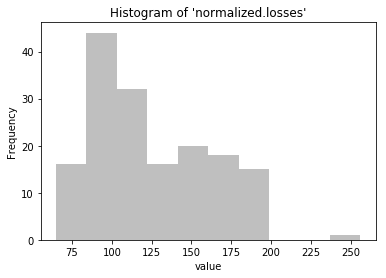

In [22]:
plot_histogram(data['normalized.losses'])

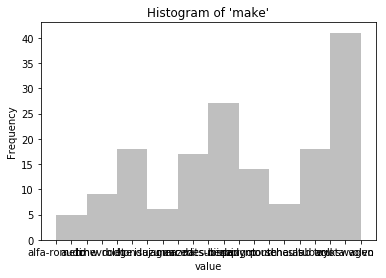

In [23]:
plot_histogram(data['make'])

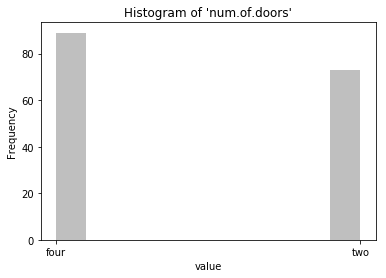

In [24]:
plot_histogram(data['num.of.doors'])

In [25]:
y = D['Car_Price']
y.head()

0    10595.0
1     8189.0
2    13645.0
3    17199.0
4    12945.0
Name: Car_Price, dtype: float64

In [26]:
#separate features and the output column before feeding into the model

D=D.drop('Car_Price',1)
D=D.drop('make',1)
D=D.drop('body.style',1)
D=D.drop('engine.location',1)
D=D.drop('city.mpg',1)
D=D.drop('highway.mpg',1)
D=D.drop('wheel.base',1)
D=D.drop('length',1)
D=D.drop('width',1)
D=D.drop('height',1)
D=D.drop('compression.ratio',1)
D=D.drop('engine.type_dohcv',1)
D=D.drop('num.of.cylinders_three',1)
D=D.drop('num.of.cylinders_twelve',1)
D=D.drop('fuel.system_4bbl',1)
D=D.drop('fuel.system_mfi',1)
D=D.drop('fuel.system_spfi',1)
D=D.drop('symboling',1)
D=D.drop('normalized.losses',1)
D=D.drop('num.of.doors_four',1)
D=D.drop('num.of.doors_two',1)
D=D.drop('drive.wheels_4wd',1)
D=D.drop('aspiration_std',1)
D=D.drop('aspiration_turbo',1)
D=D.drop('fuel.type_diesel',1)
D=D.drop('fuel.type_gas',1)
D=D.drop('num.of.cylinders_eight',1)
D=D.drop('num.of.cylinders_five',1)
D=D.drop('num.of.cylinders_four',1)
D=D.drop('num.of.cylinders_six',1)
D=D.drop('num.of.cylinders_two',1)
D=D.drop('engine.type_dohc',1)
D=D.drop('engine.type_l',1)
D=D.drop('engine.type_ohc',1)
D=D.drop('engine.type_ohcf',1)
D=D.drop('engine.type_ohcv',1)
D=D.drop('engine.type_rotor',1)
D=D.drop('fuel.system_1bbl',1)
D=D.drop('fuel.system_2bbl',1)
D=D.drop('fuel.system_idi',1)
D=D.drop('fuel.system_mpfi',1)
D=D.drop('fuel.system_spdi',1)
#D=D.drop('engine.size',1)
D=D.drop('drive.wheels_fwd',1)
D=D.drop('drive.wheels_rwd',1)
D.head()

,curb.weight,engine.size,bore,stroke,horsepower,peak.rpm
0,2385,122,3.39,3.39,84.0,4800.0
1,2405,122,3.35,3.46,88.0,5000.0
2,2385,70,3.43,3.27,101.0,6000.0
3,3071,181,3.43,3.27,160.0,5200.0
4,2465,110,3.15,3.58,101.0,5800.0


In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D, y, train_size=0.70, random_state=1)

C:\Users\Humza\AppData\Roaming\Python\Python36\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [    4.8543983     94.57971683   940.57928829 -1818.29519834    29.2892431
     2.13176555]


In [29]:
predictions = lm.predict(X_test)

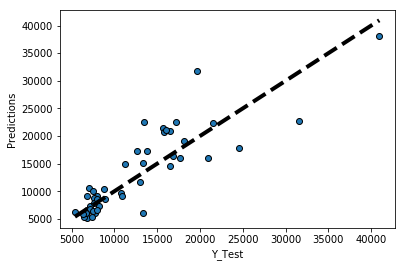

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Y_Test')
ax.set_ylabel('Predictions')
plt.show()

In [31]:
from sklearn import metrics

In [32]:
print('MSE: ',metrics.mean_squared_error(y_test,predictions))

MSE:  13972256.7791


In [33]:
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE:  3737.94820445


In [34]:
print('R2:',metrics.r2_score(y_test, predictions))

R2: 0.71442759209


In [35]:
def adj_r2(model, y, yhat):
    return(1 - float(len(y)-1)/(len(y)-len(model.coef_)-1)*(1 - metrics.r2_score(y,yhat)))

In [36]:
print('Adj-R2:', adj_r2(lm, y_test, predictions))

Adj-R2: 0.673631533817


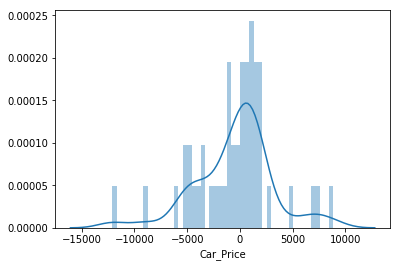

In [37]:
import seaborn as sns
sns.distplot((y_test-predictions),bins=50)

In [38]:
coefficients = pd.DataFrame(lm.coef_,D.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
curb.weight,4.854398
engine.size,94.579717
bore,940.579288
stroke,-1818.295198
horsepower,29.289243
peak.rpm,2.131766


In [39]:
#Training Accuracy
print(lm.score(X_test, y_test))

0.71442759209


In [40]:
# Loading data -cars_test.csv

In [41]:
data1=pd.read_csv("cars_test.csv")

In [42]:
null_data1 = data1[data1.isnull().any(axis=1)]
print(null_data1)

    symboling  normalized.losses           make fuel.type aspiration  \
0           3                NaN    alfa-romero       gas        std   
1           2              164.0           audi       gas        std   
2           2                NaN           audi       gas        std   
3           1                NaN           audi       gas        std   
4           1              158.0           audi       gas      turbo   
5           2              192.0            bmw       gas        std   
6           0                NaN            bmw       gas        std   
7           1              118.0          dodge       gas        std   
8           1              118.0          dodge       gas        std   
9           1              118.0          dodge       gas      turbo   
10          1              148.0          dodge       gas        std   
11          1              148.0          dodge       gas      turbo   
12         -1              110.0          dodge       gas       

In [43]:
data1 = data1.fillna(method='bfill')


In [44]:
null_data1 = data1[data1.isnull().any(axis=1)]
print(null_data1)

    symboling  normalized.losses           make fuel.type aspiration  \
0           3              164.0    alfa-romero       gas        std   
1           2              164.0           audi       gas        std   
2           2              158.0           audi       gas        std   
3           1              158.0           audi       gas        std   
4           1              158.0           audi       gas      turbo   
5           2              192.0            bmw       gas        std   
6           0              118.0            bmw       gas        std   
7           1              118.0          dodge       gas        std   
8           1              118.0          dodge       gas        std   
9           1              118.0          dodge       gas      turbo   
10          1              148.0          dodge       gas        std   
11          1              148.0          dodge       gas      turbo   
12         -1              110.0          dodge       gas       

In [45]:
todummy_list1 = ['fuel.type', 'aspiration', 'num.of.doors', 'drive.wheels', 'engine.type', 'num.of.cylinders', 'fuel.system']

In [46]:
#Function to create dummy varibale as model can only be fed with numeric data
def dummy_data(data1, todummy_list1):
    for x in todummy_list1:
        dummies = pd.get_dummies(data1[x], prefix=x, dummy_na = False)
        data1 = data1.drop(x,1)
        data1 = pd.concat([data1, dummies], axis=1)
    return data1    

In [47]:
D1 = dummy_data(data1, todummy_list1)
print (D1.head(5))

   symboling  normalized.losses         make   body.style engine.location  \
0          3              164.0  alfa-romero  convertible           front   
1          2              164.0         audi        sedan           front   
2          2              158.0         audi        sedan           front   
3          1              158.0         audi        wagon           front   
4          1              158.0         audi        sedan           front   

   wheel.base  length  width  height  curb.weight        ...         \
0        88.6   168.8   64.1    48.8         2548        ...          
1        99.4   176.6   66.4    54.3         2824        ...          
2        99.8   177.3   66.3    53.1         2507        ...          
3       105.8   192.7   71.4    55.7         2954        ...          
4       105.8   192.7   71.4    55.9         3086        ...          

   num.of.cylinders_eight  num.of.cylinders_five  num.of.cylinders_four  \
0                       0          

In [48]:
#To view NA values
D1.isnull().sum()

symboling                  0
normalized.losses          0
make                       0
body.style                 0
engine.location            0
wheel.base                 0
length                     0
width                      0
height                     0
curb.weight                0
engine.size                0
bore                       0
stroke                     0
compression.ratio          0
horsepower                 0
peak.rpm                   0
city.mpg                   0
highway.mpg                0
Car_Price                 52
fuel.type_diesel           0
fuel.type_gas              0
aspiration_std             0
aspiration_turbo           0
num.of.doors_four          0
num.of.doors_two           0
drive.wheels_4wd           0
drive.wheels_fwd           0
drive.wheels_rwd           0
engine.type_dohc           0
engine.type_l              0
engine.type_ohc            0
engine.type_ohcf           0
engine.type_ohcv           0
engine.type_rotor          0
num.of.cylinde

In [49]:

#separate features and the output column before feeding into the model

D1=D1.drop('Car_Price',1)
D1=D1.drop('make',1)
D1=D1.drop('body.style',1)
D1=D1.drop('engine.location',1)
D1=D1.drop('city.mpg',1)
D1=D1.drop('highway.mpg',1)
D1=D1.drop('wheel.base',1)
D1=D1.drop('length',1)
D1=D1.drop('width',1)
D1=D1.drop('height',1)
D1=D1.drop('compression.ratio',1)
D1=D1.drop('symboling',1)
D1=D1.drop('normalized.losses',1)
D1=D1.drop('num.of.doors_four',1)
D1=D1.drop('num.of.doors_two',1)
D1=D1.drop('drive.wheels_4wd',1)
D1=D1.drop('aspiration_std',1)
D1=D1.drop('aspiration_turbo',1)
D1=D1.drop('fuel.type_diesel',1)
D1=D1.drop('fuel.type_gas',1)
D1=D1.drop('num.of.cylinders_eight',1)
D1=D1.drop('num.of.cylinders_five',1)
D1=D1.drop('num.of.cylinders_four',1)
D1=D1.drop('num.of.cylinders_six',1)
D1=D1.drop('num.of.cylinders_two',1)
D1=D1.drop('engine.type_dohc',1)
D1=D1.drop('engine.type_l',1)
D1=D1.drop('engine.type_ohc',1)
D1=D1.drop('engine.type_ohcf',1)
D1=D1.drop('engine.type_ohcv',1)
D1=D1.drop('engine.type_rotor',1)
D1=D1.drop('fuel.system_1bbl',1)
D1=D1.drop('fuel.system_2bbl',1)
D1=D1.drop('fuel.system_idi',1)
D1=D1.drop('fuel.system_mpfi',1)
D1=D1.drop('fuel.system_spdi',1)
#D=D.drop('engine.size',1)
D1=D1.drop('drive.wheels_fwd',1)
D1=D1.drop('drive.wheels_rwd',1)
D1.head()

,curb.weight,engine.size,bore,stroke,horsepower,peak.rpm
0,2548,130,3.47,2.68,111,5000
1,2824,136,3.19,3.40,115,5500
2,2507,136,3.19,3.40,110,5500
3,2954,136,3.19,3.40,110,5500
4,3086,131,3.13,3.40,140,5500


In [50]:
y1=data1['Car_Price']
print(y1.shape)

(52,)


In [51]:
print(D1.shape)

(52, 6)


In [52]:
predictions1 = lm.predict(D1)

In [53]:
print(predictions1)

[ 14492.59263918  16010.38987692  14325.09939954  16495.01544071
  17485.13996832  12891.65789487  28392.38922773   5783.34162669
   5783.34162669   8524.6295246    6331.88863486   8830.45661765
  11458.64957307  10782.3545154    5893.66494211   5081.89851647
  10999.0671329   10361.28937301  10482.64933057  10482.64933057
  22664.02802956  30098.02149763  36778.91153808  18561.72324366
  17749.74328103  11408.9954996    6633.23432366   6536.14635762
  10800.78288861  22936.21627811  16132.18756766  15510.70936565
   6225.09187221   6331.88863486  11468.05536595  14215.32930614
  10728.55342689  12694.45308646   5272.56451239   6753.15599462
   7192.5827784    6958.46959541  14390.60923884   8685.65156316
   9380.05417328   6192.64552736  10473.69416562   7454.78908597
  11398.9300019   18269.76188583  17871.70122503  19476.70648787]
